# Importing all the libraries

In [2]:
import pandas as pd
import numpy as np

#Sklearn Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


#NLP toolkit
import nltk
#stopwords
from nltk.corpus import stopwords
#puncuations
import string
# Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import pickle


Storing all the models in variables

In [3]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()
tf= TfidfVectorizer()
cv= CountVectorizer()
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [4]:
#Data
data= pd.read_csv("mail_data.csv")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
#label encoder
#spam as 0, ham as 1
data.loc[data['Category']=='spam', 'Category',]=1
data.loc[data['Category']=='ham', 'Category',]=0
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [6]:
data.shape

(5572, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [9]:
#length of each message inculding all characters
data['Length']= data['Message'].apply(len)
data.head()

,Category,Message,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
#No. of words used in per message
data['no. of words'] =data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
#No. of Sentences
data['no. of Sentences'] =data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head()

,Category,Message,Length,no. of words,no. of Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [11]:
data[['Length','no. of words','no. of Sentences']].describe()

,Length,no. of words,no. of Sentences
count,5572.000000,5572.000000,5572.000000
mean,80.368988,18.826095,1.999641
std,59.926946,13.849205,1.520989
min,2.000000,1.000000,1.000000
25%,35.750000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,122.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [12]:
#SPAM
data[data['Category']==1][['Length','no. of words','no. of Sentences']].describe()

,Length,no. of words,no. of Sentences
count,747.000000,747.000000,747.000000
mean,137.989290,27.878179,3.028112
std,29.980287,7.036282,1.552655
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [13]:
#HAM
data[data['Category']==0][['Length','no. of words','no. of Sentences']].describe()

,Length,no. of words,no. of Sentences
count,4825.000000,4825.000000,4825.000000
mean,71.448290,17.424663,1.840415
std,58.434864,14.113530,1.452475
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,93.000000,23.000000,2.000000
max,910.000000,220.000000,38.000000


# Plotting

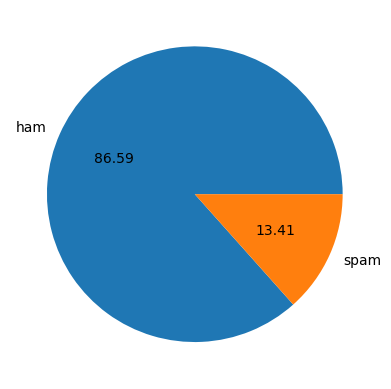

In [14]:
#Plotting
plt.pie(data['Category'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

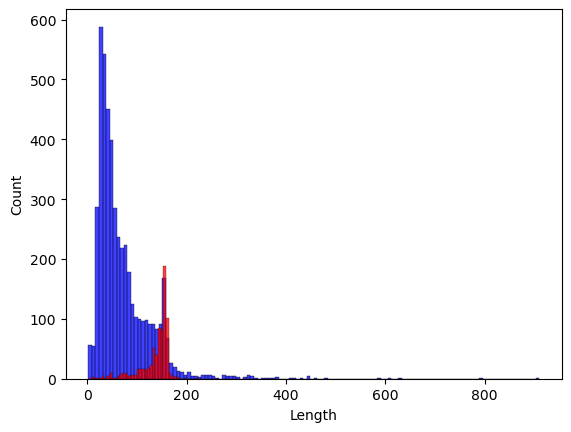

In [15]:
#Plotting ham and spam data
sns.histplot(data[data['Category']==0]['Length'],color='blue')
sns.histplot(data[data['Category']==1]['Length'],color='red')
plt.show()

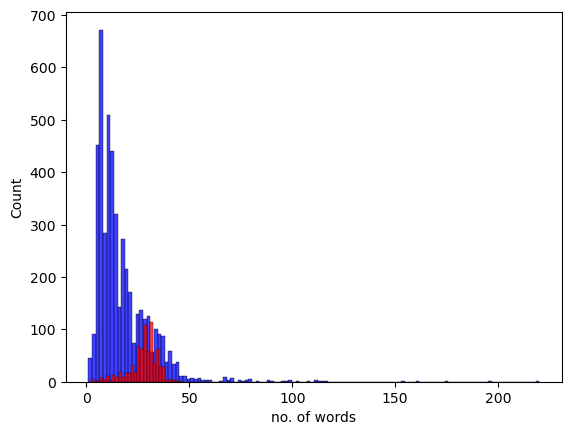

In [16]:
#Plotting ham and spam data
sns.histplot(data[data['Category']==0]['no. of words'],color='blue')
sns.histplot(data[data['Category']==1]['no. of words'],color='red')
plt.show()

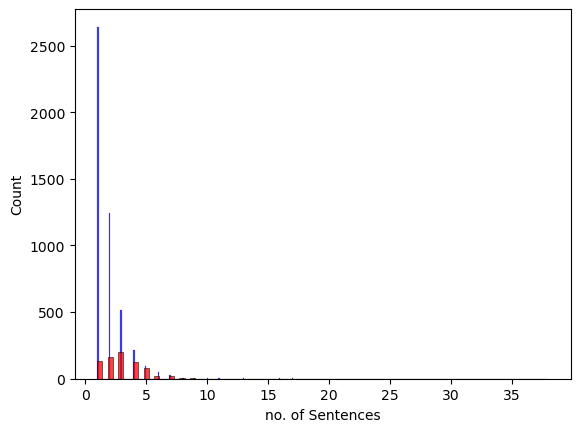

In [17]:
#Plotting ham and spam data
sns.histplot(data[data['Category']==0]['no. of Sentences'],color='blue')
sns.histplot(data[data['Category']==1]['no. of Sentences'],color='red')
plt.show()

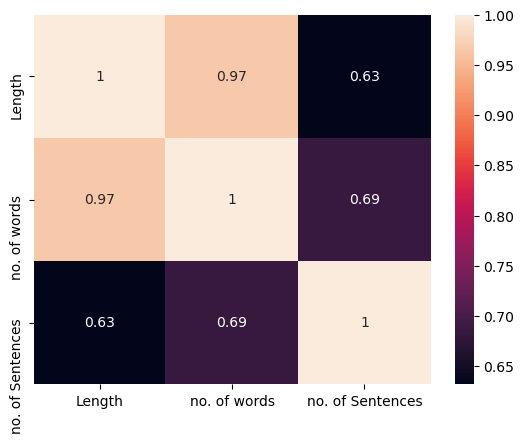

In [18]:
sns.heatmap(data.corr(),annot=True)
plt.show()

# Data Processing

1.Lower Case Conversion

2.Tokenization

3.Special Character Removal

4.Stopwords and Punctuation Removal

5.Stemming

In [19]:
#Data Preprocessing

def transform_message(Message):
    #Lower Case
    Message= Message.lower()
    #Tokenization
    Message= nltk.word_tokenize(Message)
    
    #Removing Special Character
    y= []
    for i in Message:
        if i.isalnum():
            y.append(i)
 
    
    #Removing stopwords and punctuations
    Message = y[:]
    y.clear()
    
    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    #Stemming
    Message= y[:]
    y.clear()
    
    for i in Message:
        y.append(ps.stem(i))
        
    return " ".join(y)
    
   

In [20]:
#adding transformed msg to the original data
data['Transformed_message']=data['Message'].apply(transform_message)
data.head()

,Category,Message,Length,no. of words,no. of Sentences,Transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [21]:
from wordcloud import WordCloud
wc= WordCloud(width= 500, height=500, min_font_size=10,background_color='white')

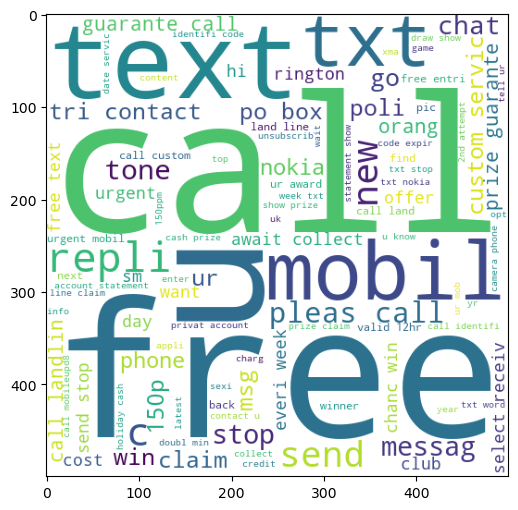

In [22]:
#Spam
spam_wc = wc.generate(data[data['Category'] == 1]['Transformed_message'].str.cat(sep=" "))
#Figure of most used words
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.show()

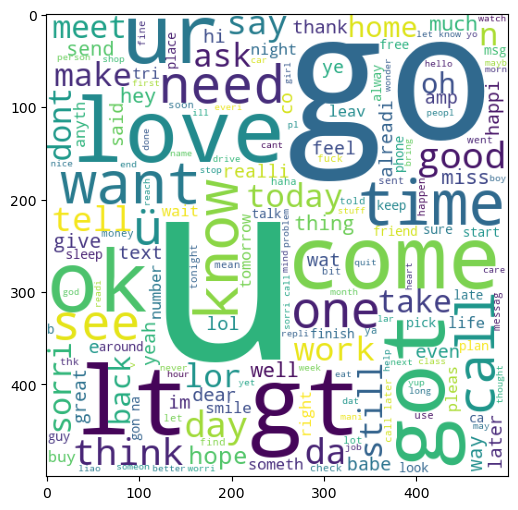

In [23]:
#Ham
ham_wc = wc.generate(data[data['Category'] == 0]['Transformed_message'].str.cat(sep=" "))
#Figure of most used words
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)
plt.show()

In [24]:
#Spam
spam_corpus = []
for msg in data[data['Category']==1]['Transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)    

11506

In [25]:
#Finding the most common words in spam mail
spam_common=Counter(spam_corpus).most_common(30)
spam_common

[('call', 362),
 ('free', 219),
 ('2', 174),
 ('txt', 169),
 ('ur', 144),
 ('text', 139),
 ('u', 138),
 ('mobil', 135),
 ('4', 120),
 ('stop', 118),
 ('claim', 113),
 ('repli', 112),
 ('prize', 92),
 ('get', 88),
 ('tone', 74),
 ('servic', 72),
 ('send', 71),
 ('new', 69),
 ('nokia', 68),
 ('award', 66),
 ('cash', 62),
 ('urgent', 62),
 ('win', 61),
 ('week', 60),
 ('contact', 60),
 ('pleas', 57),
 ('phone', 57),
 ('c', 51),
 ('custom', 51),
 ('guarante', 51)]

In [26]:
#Ham
ham_corpus = []
for msg in data[data['Category']==0]['Transformed_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus) 

38814

In [27]:
#Finding the most common words in ham mail
ham_common=Counter(ham_corpus).most_common(30)
ham_common

[('u', 994),
 ('go', 420),
 ('get', 359),
 ('gt', 318),
 ('lt', 316),
 ('2', 304),
 ('come', 298),
 ('call', 293),
 ('know', 249),
 ('ur', 247),
 ('love', 247),
 ('like', 246),
 ('got', 245),
 ('ok', 241),
 ('good', 232),
 ('time', 229),
 ('day', 218),
 ('want', 213),
 ('need', 175),
 ('one', 175),
 ('ü', 173),
 ('4', 169),
 ('lor', 162),
 ('home', 161),
 ('sorri', 156),
 ('see', 154),
 ('think', 152),
 ('take', 150),
 ('da', 150),
 ('still', 149)]

C:\Users\ujjaw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


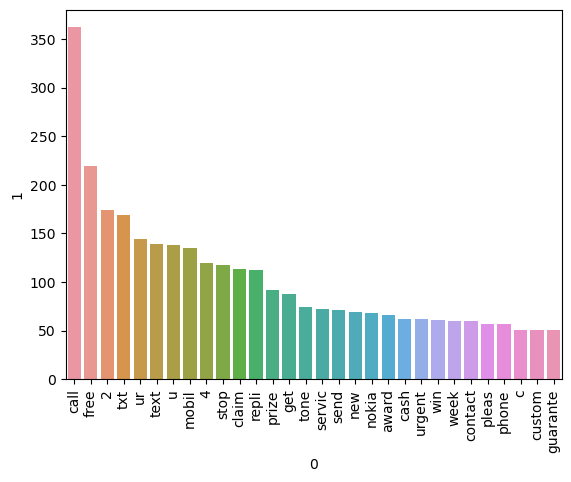

In [28]:
#spam's most common words
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\ujjaw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


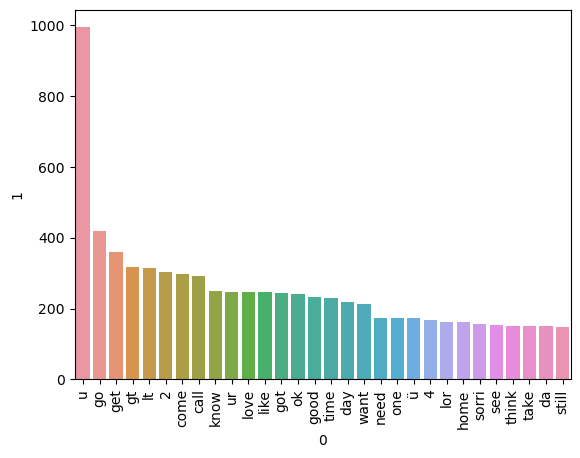

In [29]:
#Ham's most common words
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

Navis Bayes

Linear Regression

In [30]:
#using CountVector
X_c= cv.fit_transform(data['Transformed_message']).toarray()
#using TFIDF
X_t= tf.fit_transform(data['Transformed_message']).toarray()

In [31]:
print(X_c.shape,X_t.shape)

(5572, 6781) (5572, 6781)


In [32]:
y = data['Category'].astype('int')

In [33]:
#Train,Test Splitting of Data
X_trainc,X_testc,y_trainc,y_testc = train_test_split(X_c,y,test_size=0.2,random_state=2)
X_traint,X_testt,y_traint,y_testt = train_test_split(X_t,y,test_size=0.2,random_state=2)

Gaussian Naive Bayes

In [34]:
y_trainc= y_trainc.astype('int')  
y_traint= y_traint.astype('int') 

In [35]:
#count vector
gnb.fit(X_trainc,y_trainc)
y_predc = gnb.predict(X_testc)
print('CounterVector')
print('accuracy score',accuracy_score(y_testc,y_predc))
print(confusion_matrix(y_testc,y_predc))
print('precision score',precision_score(y_testc,y_predc))

# TFIDF
gnb.fit(X_traint,y_traint)
y_predt = gnb.predict(X_testt)
print('TFIDF')
print('accuracy score',accuracy_score(y_testt,y_predt))
print(confusion_matrix(y_testt,y_predt))
print('precision score',precision_score(y_testt,y_predt))

CounterVector
accuracy score 0.862780269058296
[[826 131]
 [ 22 136]]
precision score 0.5093632958801498
TFIDF
accuracy score 0.8565022421524664
[[825 132]
 [ 28 130]]
precision score 0.4961832061068702


Multinomial Naive bayes

In [36]:
#CountVector
mnb.fit(X_trainc,y_trainc)
y_predc = mnb.predict(X_testc)
print('CounterVector')
print('accuracy score',accuracy_score(y_testc,y_predc))
print(confusion_matrix(y_testc,y_predc))
print('precision score',precision_score(y_testc,y_predc))

#TFIDF
mnb.fit(X_traint,y_traint)
y_predt = mnb.predict(X_testt)
print('TFIDF')
print('accuracy score',accuracy_score(y_testt,y_predt))
print(confusion_matrix(y_testt,y_predt))
print('precision score',precision_score(y_testt,y_predt))

CounterVector
accuracy score 0.968609865470852
[[939  18]
 [ 17 141]]
precision score 0.8867924528301887
TFIDF
accuracy score 0.95695067264574
[[957   0]
 [ 48 110]]
precision score 1.0


Bernoulli Navis Byes

In [37]:
#Count Vector
bnb.fit(X_trainc,y_trainc)
y_predc = bnb.predict(X_testc)
print('CounterVector')
print('accuracy score',accuracy_score(y_testc,y_predc))
print(confusion_matrix(y_testc,y_predc))
print('precision score',precision_score(y_testc,y_predc))

#TFIDF
bnb.fit(X_traint,y_traint)
y_predt = bnb.predict(X_testt)
print('TFIDF')
print('accuracy score',accuracy_score(y_testt,y_predt))
print(confusion_matrix(y_testt,y_predt))
print('precision score',precision_score(y_testt,y_predt))

CounterVector
accuracy score 0.9623318385650225
[[952   5]
 [ 37 121]]
precision score 0.9603174603174603
TFIDF
accuracy score 0.9623318385650225
[[952   5]
 [ 37 121]]
precision score 0.9603174603174603


Best accuracy and precision value with TFIDF---> MNB

In [38]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
  
}

TFIDF

In [39]:
#using TFIDF
X= tf.fit_transform(data['Transformed_message']).toarray()
y = data['Category'].astype('int')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
y_train=y_train.astype('int') 

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision


In [40]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9695067264573991
Precision -  0.9696969696969697
For  KN
Accuracy -  0.895067264573991
Precision -  1.0
For  NB
Accuracy -  0.95695067264574
Precision -  1.0
For  DT
Accuracy -  0.9273542600896861
Precision -  0.808
For  LR
Accuracy -  0.9524663677130045
Precision -  0.9338842975206612
For  RF
Accuracy -  0.9704035874439462
Precision -  1.0
For  AdaBoost
Accuracy -  0.9596412556053812
Precision -  0.924812030075188
For  BgC
Accuracy -  0.9560538116591928
Precision -  0.8609271523178808
For  ETC
Accuracy -  0.9704035874439462
Precision -  0.9921259842519685
For  GBDT
Accuracy -  0.9515695067264573
Precision -  0.956140350877193


In [41]:
performance_df_tf = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df_tf

,Algorithm,Accuracy,Precision
1,KN,0.895067,1.000000
2,NB,0.956951,1.000000
5,RF,0.970404,1.000000
8,ETC,0.970404,0.992126
0,SVC,0.969507,0.969697
9,GBDT,0.951570,0.956140
4,LR,0.952466,0.933884
6,AdaBoost,0.959641,0.924812
7,BgC,0.956054,0.860927
3,DT,0.927354,0.808000


CountVector

In [42]:
#using CountVector
X= cv.fit_transform(data['Transformed_message']).toarray()
y = data['Category'].astype('int')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
y_train=y_train.astype('int') 

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [43]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9264573991031391
Precision -  0.7714285714285715
For  KN
Accuracy -  0.9067264573991032
Precision -  1.0
For  NB
Accuracy -  0.968609865470852
Precision -  0.8867924528301887
For  DT
Accuracy -  0.9112107623318386
Precision -  0.9041095890410958
For  LR
Accuracy -  0.9713004484304932
Precision -  0.9632352941176471
For  RF
Accuracy -  0.967713004484305
Precision -  1.0
For  AdaBoost
Accuracy -  0.9596412556053812
Precision -  0.952
For  BgC
Accuracy -  0.9641255605381166
Precision -  0.927536231884058
For  ETC
Accuracy -  0.9704035874439462
Precision -  0.9844961240310077
For  GBDT
Accuracy -  0.947085201793722
Precision -  0.9380530973451328


In [44]:
performance_df_cv = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df_cv.head()

,Algorithm,Accuracy,Precision
1,KN,0.906726,1.000000
5,RF,0.967713,1.000000
8,ETC,0.970404,0.984496
4,LR,0.971300,0.963235
6,AdaBoost,0.959641,0.952000


In [45]:
performance = pd.concat([performance_df_tf, performance_df_cv], axis=1, join='inner')
performance

,Algorithm,Accuracy,Precision,Algorithm,Accuracy,Precision
1,KN,0.895067,1.000000,KN,0.906726,1.000000
2,NB,0.956951,1.000000,NB,0.968610,0.886792
5,RF,0.970404,1.000000,RF,0.967713,1.000000
8,ETC,0.970404,0.992126,ETC,0.970404,0.984496
0,SVC,0.969507,0.969697,SVC,0.926457,0.771429
9,GBDT,0.951570,0.956140,GBDT,0.947085,0.938053
4,LR,0.952466,0.933884,LR,0.971300,0.963235
6,AdaBoost,0.959641,0.924812,AdaBoost,0.959641,0.952000
7,BgC,0.956054,0.860927,BgC,0.964126,0.927536
3,DT,0.927354,0.808000,DT,0.911211,0.904110


In [46]:
header=[['TFIDF','TFIDF','TFIDF','CountVector','CountVector','CountVector'],
        ['Algorithm','Variable','Precision','Algorithm','Variable','Precision']]
 
performance.columns=header
 
performance.head()

TFIDF                     CountVector                    
  Algorithm  Variable Precision   Algorithm  Variable Precision
1        KN  0.895067  1.000000          KN  0.906726  1.000000
2        NB  0.956951  1.000000          NB  0.968610  0.886792
5        RF  0.970404  1.000000          RF  0.967713  1.000000
8       ETC  0.970404  0.992126         ETC  0.970404  0.984496
0       SVC  0.969507  0.969697         SVC  0.926457  0.771429

Best model --> Navis Byes --> MNB

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
